In [1]:
import numpy as np
import pandas as pd
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [10]:
file_names = os.listdir('C:/Users/ACER/Desktop/Mini Project/main_v3/xray/')

train_image=[]
for im in file_names:
    img=image.load_img('C:/Users/ACER/Desktop/Mini Project/main_v3/xray/'+im,target_size=(96,96),color_mode='grayscale')
    img=image.img_to_array(img)
    img=img/255
    train_image.append(img)

clean_df=np.array(train_image)

In [11]:
def plot_img(image_data):
  fig,axes=plt.subplots(1,5)
  fig.set_size_inches(40,20)
  for i in range(0,5):
    axes[i].imshow(image_data[i].reshape(96,96),cmap='gray')
  plt.show()

In [16]:
def add_noise(image_data):
  row,col,ch=image_data.shape
  mean=0
  sd=1
  gauss=np.random.normal(mean,sd,(row,col,ch))
  gauss=gauss.reshape(row,col,ch)
  noisy=image_data+gauss*0.05
  return noisy

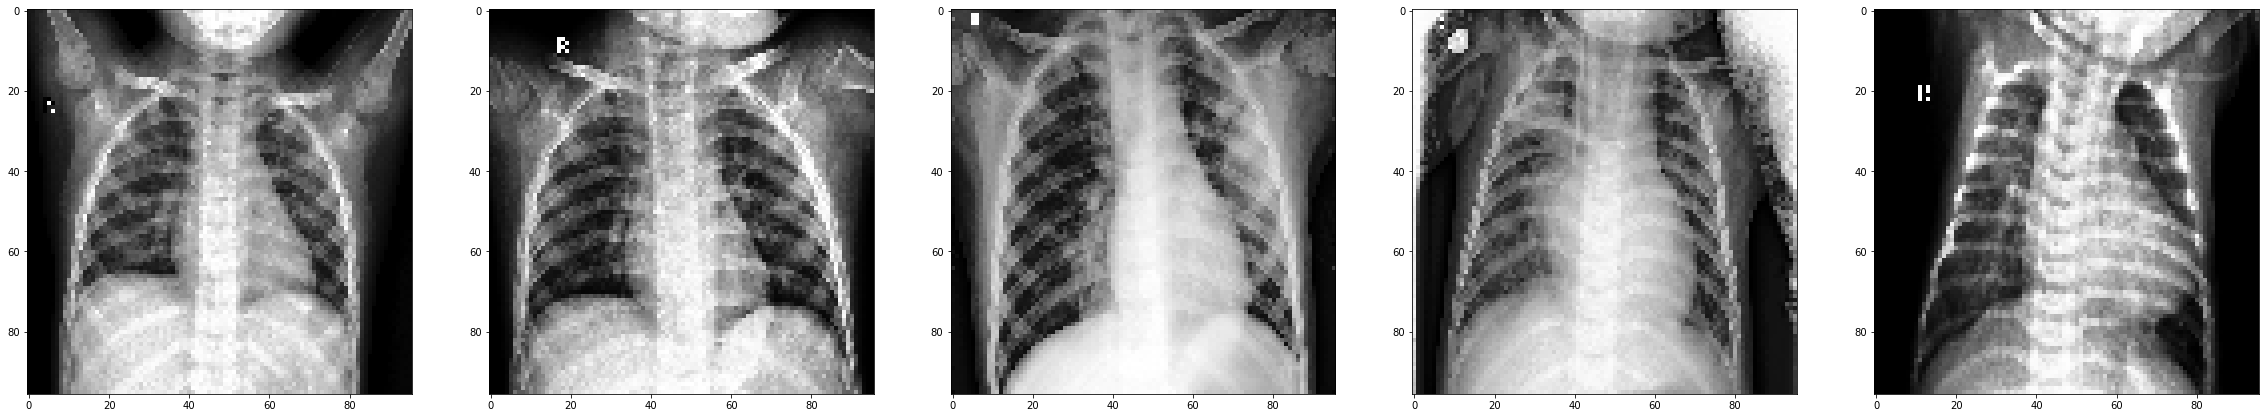

In [17]:
plot_img(clean_df)

In [18]:
noised_df=[]
for img in clean_df:
    noisy=add_noise(img)
    noised_df.append(noisy)

noised_df=np.array(noised_df)

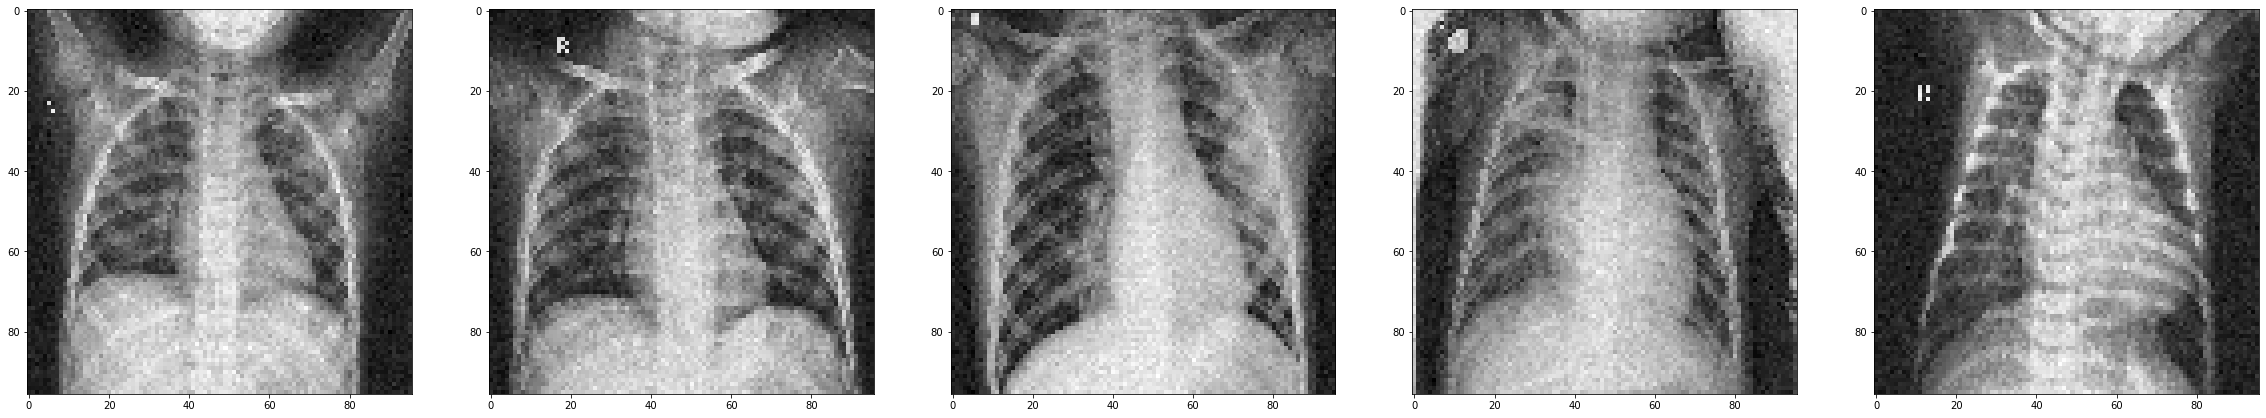

In [19]:
plot_img(noised_df)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(clean_df, noised_df, test_size=0.20)

In [21]:
from keras.models import Model
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Input

input_img=Input(shape=(96,96,1))

x = Conv2D(96, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(96, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
   
x = Conv2D(96, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(96, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
   
autoencoder = Model(inputs=input_img, outputs=x)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
autoencoder.fit(y_train, x_train, epochs=100, batch_size=10, validation_data=(y_test,x_test), callbacks=[early_stopping])

Epoch 1/100
90/90 [==============================] - 62s 691ms/step - loss: 0.5744 - val_loss: 0.5553
Epoch 2/100
90/90 [==============================] - 61s 683ms/step - loss: 0.5508 - val_loss: 0.5494
Epoch 3/100
90/90 [==============================] - 68s 750ms/step - loss: 0.5484 - val_loss: 0.5470
Epoch 4/100
90/90 [==============================] - 68s 757ms/step - loss: 0.5475 - val_loss: 0.5475
Epoch 5/100
90/90 [==============================] - 69s 767ms/step - loss: 0.5471 - val_loss: 0.5465
Epoch 6/100
90/90 [==============================] - 69s 763ms/step - loss: 0.5466 - val_loss: 0.5456
Epoch 7/100
90/90 [==============================] - 69s 768ms/step - loss: 0.5462 - val_loss: 0.5471
Epoch 8/100
90/90 [==============================] - 70s 780ms/step - loss: 0.5460 - val_loss: 0.5451
Epoch 9/100
90/90 [==============================] - 68s 756ms/step - loss: 0.5458 - val_loss: 0.5449
Epoch 10/100
90/90 [==============================] - 70s 779ms/step - loss: 0.545

90/90 [==============================] - 85s 941ms/step - loss: 0.5430 - val_loss: 0.5434
Epoch 81/100
90/90 [==============================] - 84s 937ms/step - loss: 0.5430 - val_loss: 0.5424
Epoch 82/100
90/90 [==============================] - 83s 921ms/step - loss: 0.5428 - val_loss: 0.5424
Epoch 83/100
90/90 [==============================] - 85s 950ms/step - loss: 0.5428 - val_loss: 0.5424
Epoch 84/100
90/90 [==============================] - 82s 914ms/step - loss: 0.5428 - val_loss: 0.5425
Epoch 85/100
90/90 [==============================] - 84s 936ms/step - loss: 0.5428 - val_loss: 0.5424
Epoch 86/100
90/90 [==============================] - 85s 947ms/step - loss: 0.5428 - val_loss: 0.5424
Epoch 87/100
90/90 [==============================] - 84s 935ms/step - loss: 0.5429 - val_loss: 0.5423
Epoch 88/100
90/90 [==============================] - 86s 954ms/step - loss: 0.5428 - val_loss: 0.5425
Epoch 89/100
90/90 [==============================] - 84s 932ms/step - loss: 0.5428 - 

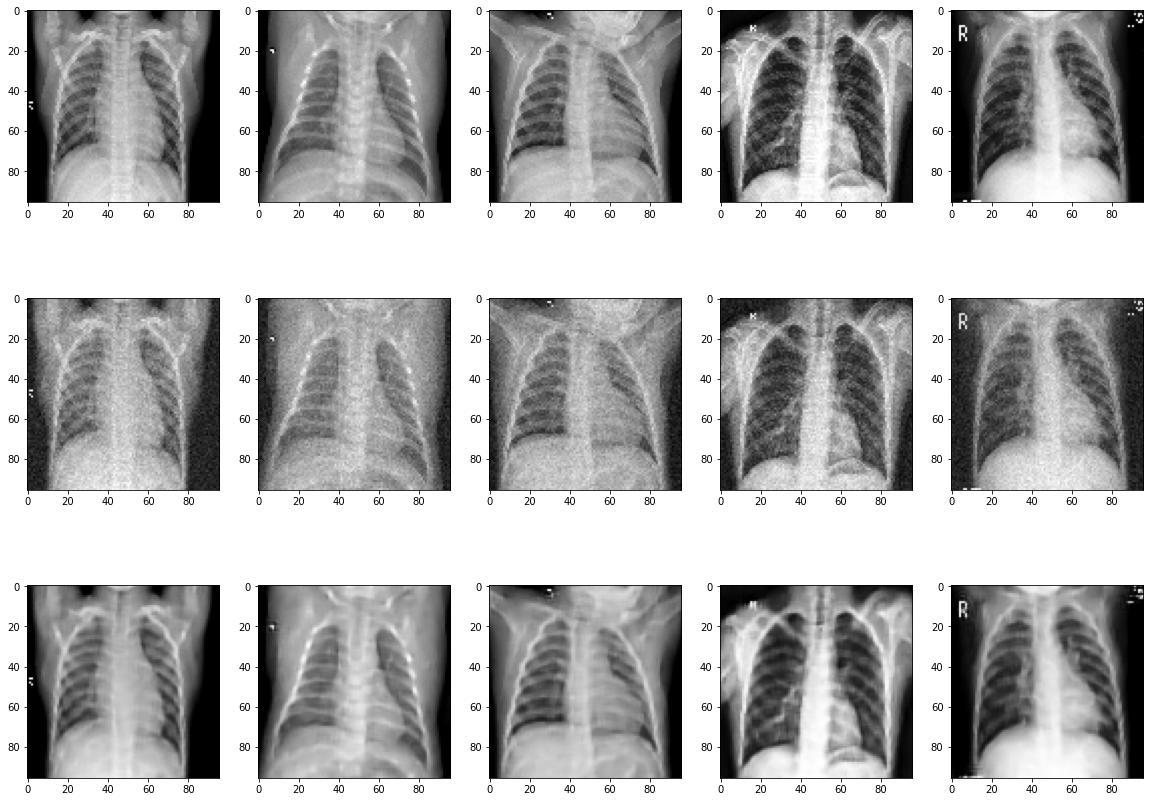

In [30]:
pred= autoencoder.predict(y_test[:5])
f, ax = plt.subplots(3, 5)
f.set_size_inches(20,15)
for i in range(5):
    ax[0][i].imshow(np.reshape(x_test[i], (96,96)),cmap="gray")
    ax[1][i].imshow(np.reshape(y_test[i], (96,96)),cmap="gray")
    ax[2][i].imshow(np.reshape(pred[i], (96,96)),cmap="gray")
plt.show()